Point2 pembahasannya mengenai ini si mas: 
1. Memberikan pengenalan mengenai Matplotlib dan Seaborn
2. Membuat single line chart dan multiple line chart untuk mengetahui tren
dari data time series
3. Membuat scatter plot untuk mengetahui hubungan dua atribut
4. Membuat matriks korelasi untuk mengetahui hubungan antar beberapa
atribut
5. Membuat histogram untuk mengetahui distribusi dari suatu atribut
6. Membuat boxplot untuk menentukan distribusi dan outlier dari atribut
7. Membuat bar chart dan count plot untuk data kategorik
8. Geo-visualization (menggunakan atribut latitude dan longitude)

# Library yang digunakan 
1. Matplotlib: Visualization
2. seaborn: Beatiful Visualization 
3. Plotly : interactive visualization
4. Folium : untuk geo-visualization

In [1]:
# Menyiapkan library untuk load data
import pandas as pd
import json
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50
os.chdir('D:/Karir/DQLab/mentoring/data latihan')

In [2]:
sales = 'superstore.xls'

In [3]:
df_sales = pd.read_excel(sales)

# Checking Data Shape

In [5]:
df_sales = df_sales.sort_values('Order Date')

In [6]:
# melihat shape datanya
df_sales.shape

(9994, 21)

In [7]:
# df_taksi = df_taksi.head(500)

In [8]:
df_sales.head(2)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7980    7981  CA-2014-103800 2014-01-03 2014-01-07  Standard Class   
739      740  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   

     Customer ID  Customer Name      Segment        Country        City  \
7980    DP-13000  Darren Powers     Consumer  United States     Houston   
739     PO-19195  Phillina Ober  Home Office  United States  Naperville   

         State  Postal Code   Region       Product ID         Category  \
7980     Texas        77095  Central  OFF-PA-10000174  Office Supplies   
739   Illinois        60540  Central  OFF-LA-10003223  Office Supplies   

     Sub-Category                                       Product Name   Sales  \
7980        Paper  Message Book, Wirebound, Four 5 1/2" X 4" Form...  16.448   
739        Labels                                          Avery 508  11.784   

      Quantity  Discount  Profit  
7980         2       0.2  5.5512  
739          3       0.2  4.2717

In [9]:
# date extraction
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
# mengambil tahun
df_sales['Year_Order'] = df_sales['Order Date'].dt.year
# mengambil month/ bulan
df_sales['Year_month'] = df_sales['Order Date'].dt.month

<h1> 1. Matplotlib </h1>

Untuk menginstall ketik code beriku:
```python
!pip install matplotlib
```
#Matplotlib source: 
https://matplotlib.org/

#Matplotlib galery:
https://matplotlib.org/stable/gallery/index.html

<h3> 1.1. Line Chart</h3>

In [15]:
# !pip install matplotlib

In [16]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [27]:
df_sales[['Sales','Year_Order']].groupby('Year_Order').agg('sum')

Sales
Year_Order             
2014        484247.4981
2015        470532.5090
2016        609205.5980
2017        733215.2552

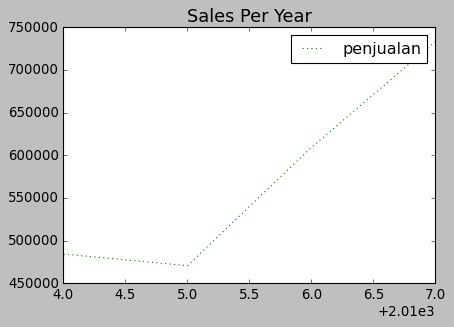

In [38]:
# Single line
plt.style.use('classic')
plt.figure(figsize = (6,4)) #figsize
plt.plot(df_sales[['Sales','Year_Order']].groupby('Year_Order').agg('sum'), color = 'green',
         linestyle = ':', label = 'penjualan') #plotting
plt.title('Sales Per Year', size = 16) #
labels = df_sales[['Sales','Year_Order']].groupby('Year_Order').agg('sum').index.tolist()
#plt.xticks(labels)
plt.legend()
plt.show()

In [12]:
# df_sales[['Sales','Year_Order']].groupby('Year_Order').agg('sum').index.tolist()

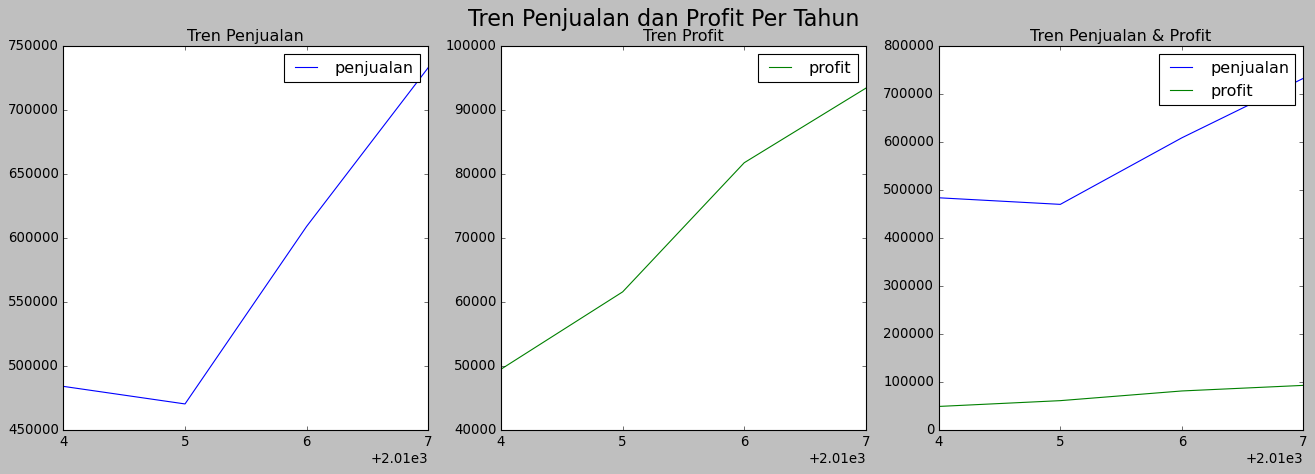

In [42]:
# multiple line with multiple plots
fig, ax = plt.subplots(1,3, figsize = (20,6))
lab = [2014,2015,2016,2017]


fig.suptitle('Tren Penjualan dan Profit Per Tahun', fontsize=20)
ax[0].plot(df_sales[['Sales','Year_Order']].groupby('Year_Order').agg('sum'), label = 'penjualan', color = 'blue')
ax[1].plot(df_sales[['Profit','Year_Order']].groupby('Year_Order').agg('sum'), label = 'profit', color = 'green')
ax[2].plot(df_sales[['Sales','Year_Order']].groupby('Year_Order').agg('sum'), label = 'penjualan')
ax[2].plot(df_sales[['Profit','Year_Order']].groupby('Year_Order').agg('sum'), label = 'profit')

#title every subplots
ax[0].set_title('Tren Penjualan')
ax[1].set_title('Tren Profit')
ax[2].set_title('Tren Penjualan & Profit')


# #xticks replacement
ax[0].set_xticks(lab)
ax[1].set_xticks(lab)
ax[2].set_xticks(lab)


# Legend
ax[0].legend()
ax[1].legend()
ax[2].legend()

#Show
plt.show()

<h3>1.2. Barchart</h3> 

In [52]:
# plt.barh(df_sales.Category, df_sales.Profit)
# plt.title('Perbandingan Profit By Category Produk')
# plt.show()

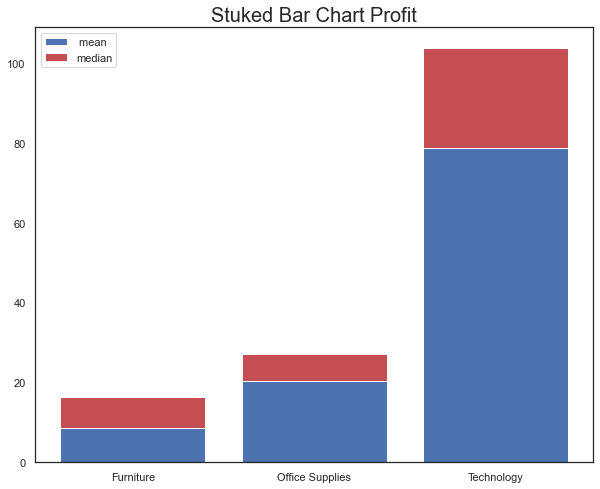

In [210]:
# stucked bar chart
az = df_sales[['Category','Profit']].groupby('Category').agg(['sum','mean','median'])
plt.figure(figsize = (10,8))
plt.bar(az.index,az['Profit']['mean'], color = 'b', label = ' mean')
plt.bar(az.index, az['Profit']['median'],bottom=az['Profit']['mean'], color = 'r', label = 'median')
plt.legend()
plt.title('Stuked Bar Chart Profit', size = 20);

<h3>1.3. Scatterplot</h3>

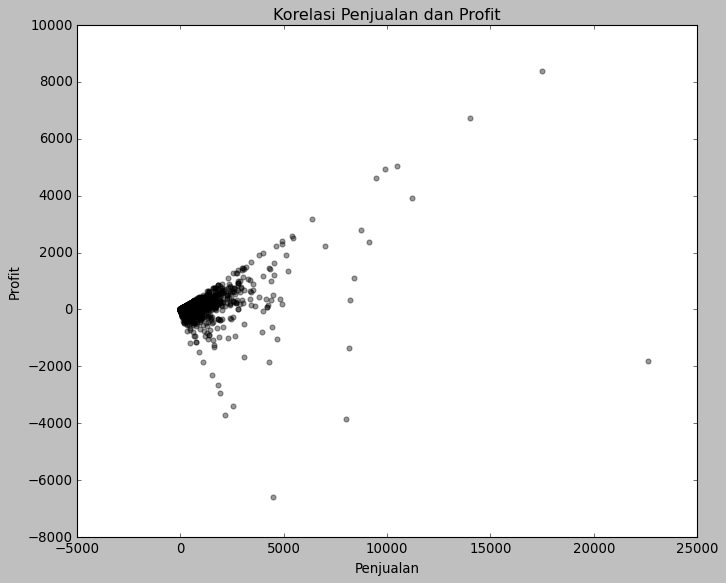

In [55]:
# 2 variables
plt.figure(figsize = (10,8))
plt.scatter(x = df_sales.Sales, y = df_sales.Profit, 
            color = 'black', cmap ='Diverging', alpha=0.4)
plt.title('Korelasi Penjualan dan Profit')
plt.ylabel('Profit')
plt.xlabel('Penjualan')
plt.show()

In [56]:
df_sales[['Sales','Profit','Discount']].head(3)

Sales   Profit  Discount
7980   16.448   5.5512       0.2
739    11.784   4.2717       0.2
740   272.736 -64.7748       0.2

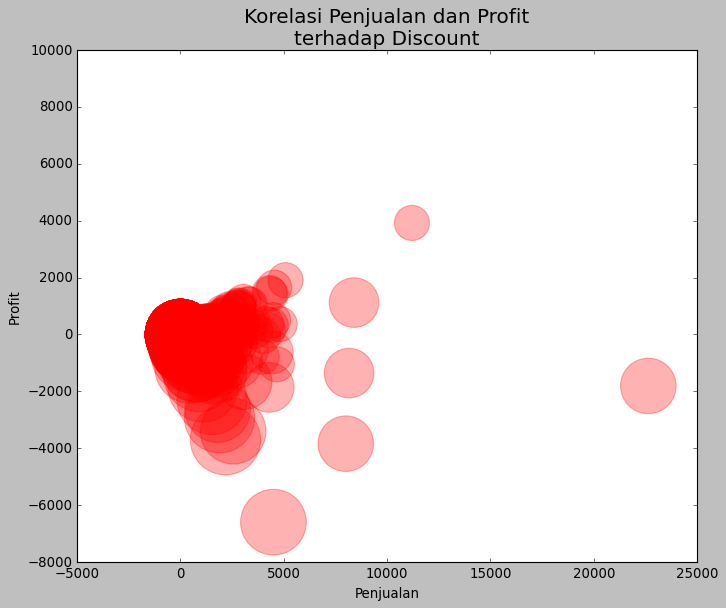

In [62]:
# 3 variables
plt.figure(figsize = (10,8))
j = plt.scatter(x = df_sales.Sales, y = df_sales.Profit, s= df_sales.Discount*5000, 
            color = 'r', cmap ='Diverging', alpha=0.3)
plt.title('Korelasi Penjualan dan Profit\nterhadap Discount', size = 18)
plt.ylabel('Profit')
plt.xlabel('Penjualan')
plt.show()

<h3>1.4 Matrix Correlation</h3>

In [63]:
df_sales.corr()

Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497   
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961   
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064   
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253   
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487   
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000   
Year_Order   0.015430     0.004299 -0.009679 -0.005810 -0.002662  0.004670   
Year_month  -0.018732     0.026234 -0.000625  0.023355 -0.004935 -0.000502   

             Year_Order  Year_month  
Row ID         0.015430   -0.018732  
Postal Code    0.004299    0.026234  
Sales         -0.009679   -0.000625  
Quantity      -0.005810    0.023355  
Discount      -0.002662   -0.004935  
Profit         0.004670   -0.000502  
Year_Order     1.000000   -0.020183  
Year_month    -0.020183    1.000000

In [68]:
corr = df_sales.corr()
corr.style.background_gradient(cmap='coolwarm') #

In [66]:
# corr.style.background_gradient()

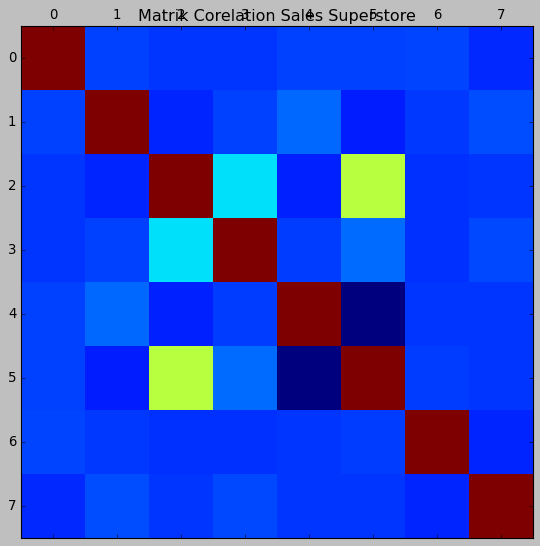

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
s = ax.matshow(corr)
ax.set_title('Matrik Corelation Sales Superstore')
fig.colorbar(s)
plt.show()

<h3>1.5. Histogram</h3>

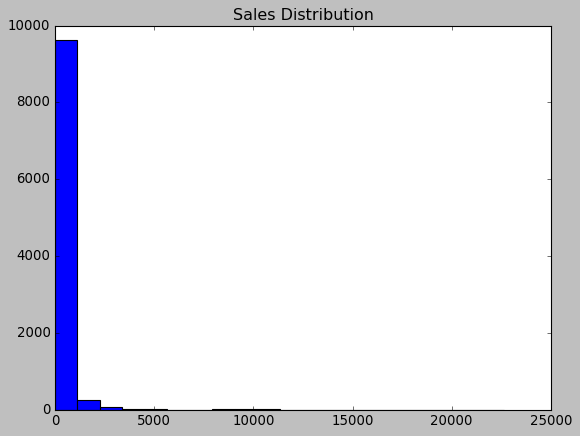

In [79]:
plt.hist(df_sales.Sales, bins=20)
plt.title("Sales Distribution")
plt.show()

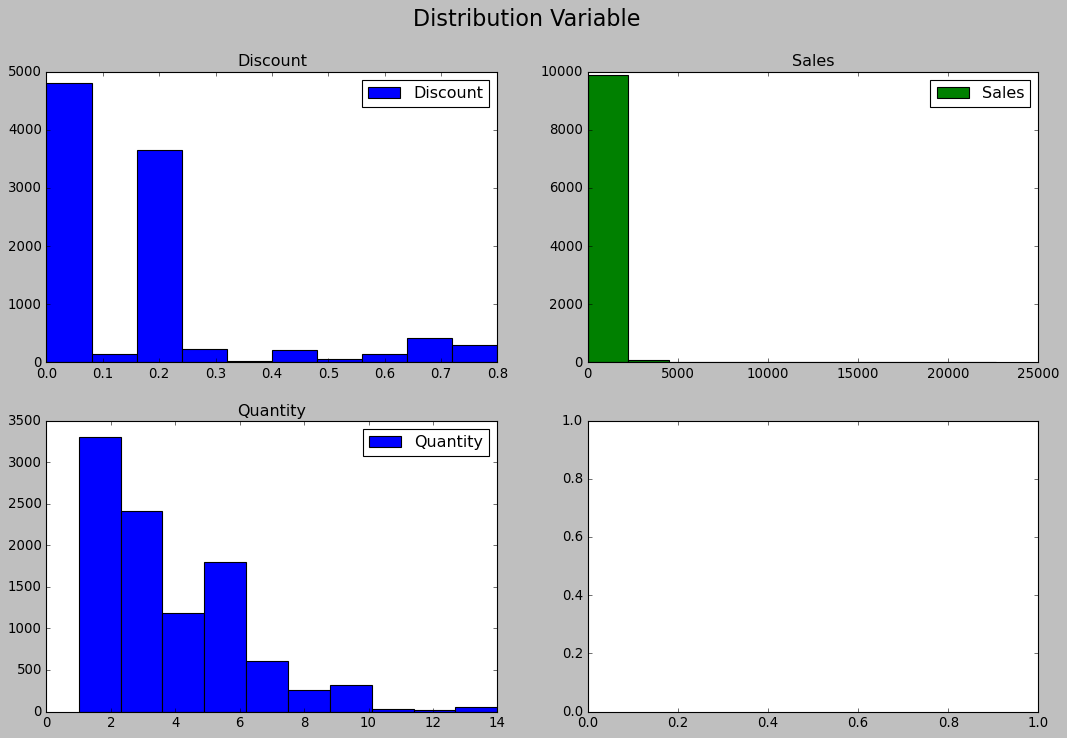

In [81]:
# multiple Distribution
fig, ax = plt.subplots(2,2, figsize = (16,10))
lab = [2014,2015,2016,2017]


fig.suptitle('Distribution Variable', fontsize=20)
ax[0][0].hist(df_sales.Discount, label = 'Discount', color = 'blue')
ax[0][1].hist(df_sales.Sales, label = 'Sales', color = 'green')
ax[1][0].hist(df_sales.Quantity, label = 'Quantity')
# ax[1][1].hist(df_sales.Profit, label = 'Profit')

#title every subplots
ax[0][0].set_title('Discount')
ax[0][1].set_title('Sales')
ax[1][0].set_title('Quantity')
# ax[1][1].set_title("Profit")

# Legend
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
# ax[1][1].legend()

#Show
plt.show()

<h3>1.6. Boxplot</h3>

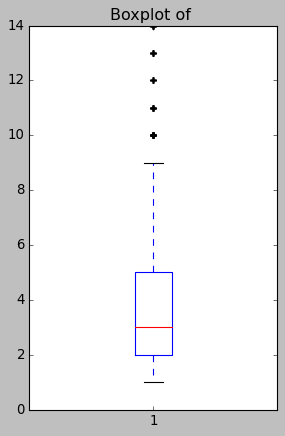

In [82]:
plt.figure(figsize = (4,6))
plt.boxplot(df_sales.Quantity)
plt.title("Boxplot of ")
plt.show()
#plt.boxplot?

In [83]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df_sales.Quantity)

sub      values
0                  IQR    3.000000
1          Upper Bound    9.500000
2          Lower Bound   -2.500000
3         Sum outliers  170.000000
4  percentage outliers    1.701021

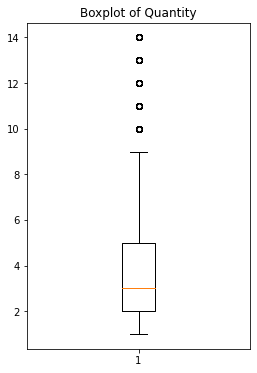

In [36]:
plt.figure(figsize = (4,6))
plt.boxplot(df_sales.Quantity)
plt.title('Boxplot of Quantity')
plt.show()

# Pie Chart

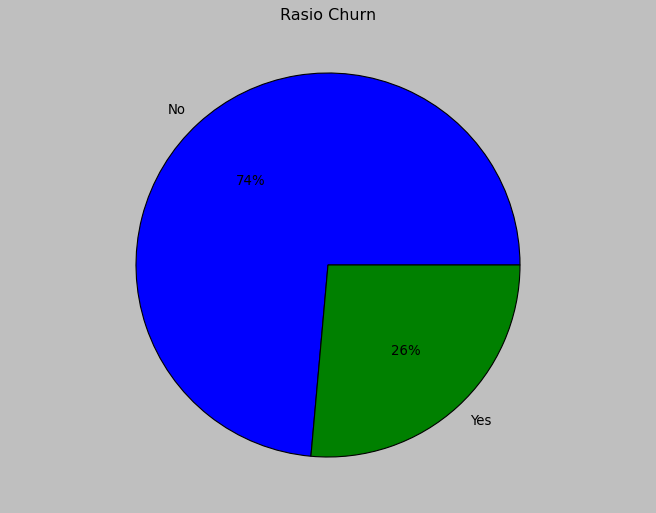

In [85]:
ama = 'telco.csv'
df_ama = pd.read_csv(ama)

#Your codes here
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_ama.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
ax.set_title('Rasio Churn')
plt.show()

# Area Stacked

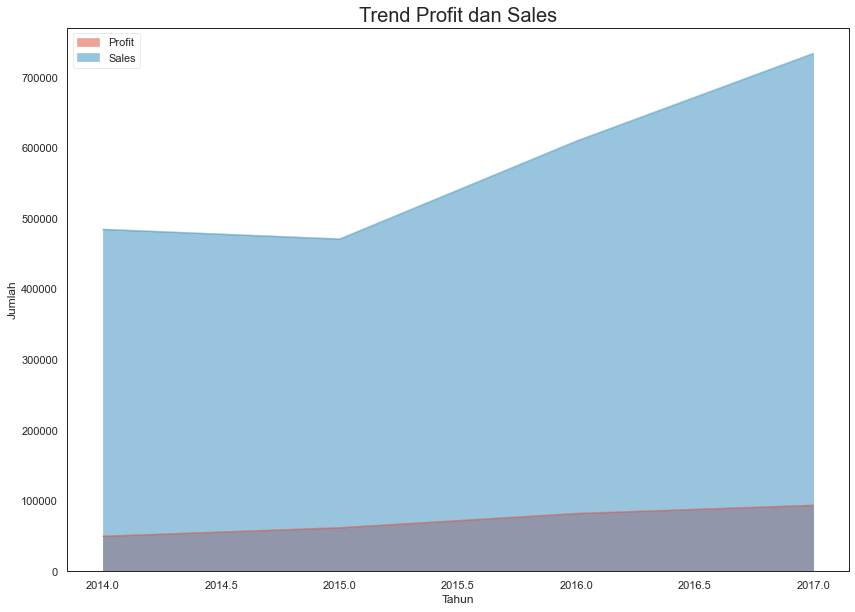

In [264]:
df_new = df_sales[['Year_Order','Profit','Sales']].groupby('Year_Order').agg('sum')
df_new.index = df_new.index.map(int)
df_new.plot(kind='area', 
             stacked=False,
             figsize=(14, 10), # pass a tuple (x, y) size
             )
plt.title('Trend Profit dan Sales', size = 20)
plt.ylabel('Jumlah')
plt.xlabel('Tahun')
plt.show()

In [ ]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Plotly

In [212]:
import plotly.express as px
fig = px.imshow(corr)
fig.show()

In [38]:
import plotly.express as px
fig = px.box(df_sales.Quantity)
fig.show()

<h1>2. Seaborn</h1>

Untuk menginstall ketik code beriku:
```python
!pip install seaborn
```
#seaborn source: 
https://seaborn.pydata.org/

#seaborn galery:
https://seaborn.pydata.org/examples/index.html

In [239]:
import seaborn as sns
#plt.style.available # hilang pagar di depan untuk melihat thema seaborn

In [237]:
sns.set_style('white')

<h3>2.1. Line and Multiple Line</h3>

In [207]:
# df_sales
sns.set_style("white")

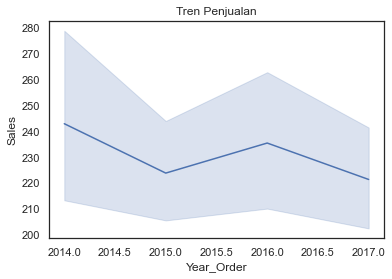

In [208]:
# one line 
sns.lineplot(df_sales['Year_Order'], df_sales["Sales"]).set_title('Tren Penjualan')
plt.show()

In [142]:
df_sales['Year_Order'].unique().tolist()

[2014, 2015, 2016, 2017]

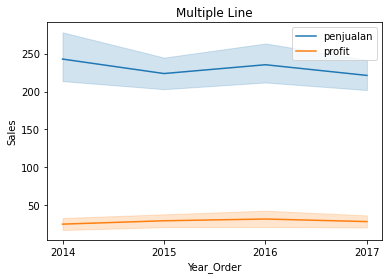

In [146]:
#multiple lines
h = sns.lineplot(df_sales['Year_Order'],df_sales['Sales'], label = 'penjualan')
h = sns.lineplot(df_sales['Year_Order'],df_sales['Profit'], label = 'profit')
h.set(xticks = df_sales['Year_Order'].unique().tolist())
h.set(title='Multiple Line');

<h3>2.2 Barchart and countplot</h3>

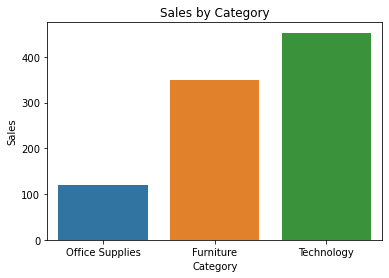

In [63]:
sns.barplot(df_sales['Category'],df_sales['Sales'], ci = False).set_title('Sales by Category')
plt.show()

In [65]:
df_sales.head(2)

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7980    7981  CA-2014-103800 2014-01-03 2014-01-07  Standard Class   
739      740  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   

     Customer ID  Customer Name      Segment        Country        City  \
7980    DP-13000  Darren Powers     Consumer  United States     Houston   
739     PO-19195  Phillina Ober  Home Office  United States  Naperville   

         State  Postal Code   Region       Product ID         Category  \
7980     Texas        77095  Central  OFF-PA-10000174  Office Supplies   
739   Illinois        60540  Central  OFF-LA-10003223  Office Supplies   

     Sub-Category                                       Product Name   Sales  \
7980        Paper  Message Book, Wirebound, Four 5 1/2" X 4" Form...  16.448   
739        Labels                                          Avery 508  11.784   

      Quantity  Discount  Profit  Year_Order  Year_month  
7980         2       0.2  5.5512        2014           1  
739          3       0.2  4.2717        2014           1

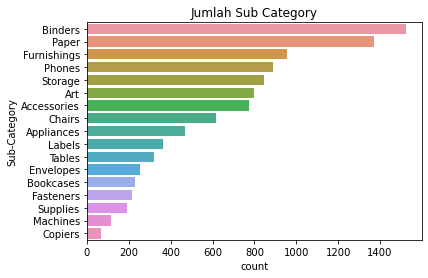

In [87]:
sns.countplot(y = df_sales['Sub-Category'], 
              order = df_sales['Sub-Category'].value_counts().index).set_title('Jumlah Sub Category');

In [175]:
alls = df_sales.columns.tolist()
num = df_sales.describe().columns.tolist()
cate = [i for i in alls if i not in num]

In [190]:
# cate

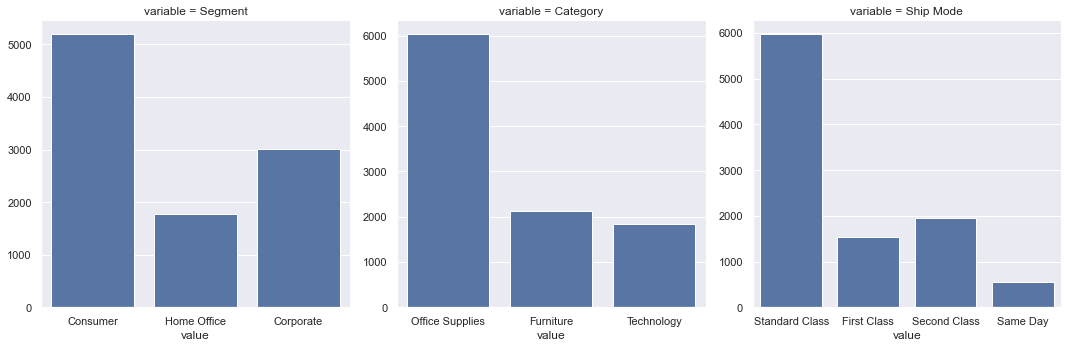

In [189]:
num = df_sales[['Segment','Category','Ship Mode']]
f= pd.melt(num, value_vars=num)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.countplot, "value");

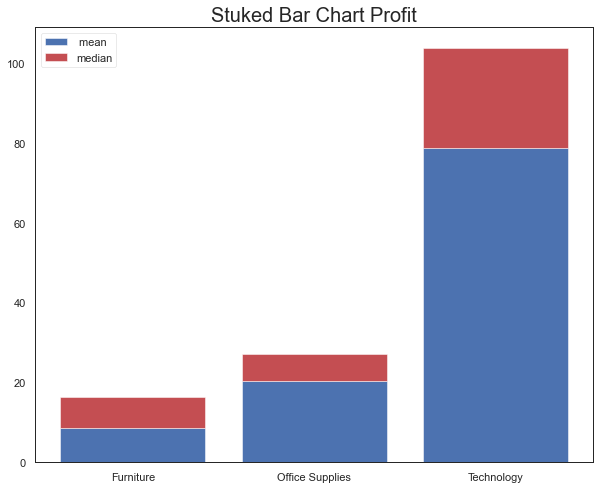

In [240]:
#stucked bar chart
az = df_sales[['Category','Profit']].groupby('Category').agg(['sum','mean','median'])
plt.figure(figsize = (10,8))
plt.bar(az.index,az['Profit']['mean'], color = 'b', label = ' mean')
plt.bar(az.index, az['Profit']['median'],bottom=az['Profit']['mean'], color = 'r', label = 'median')
plt.legend()
plt.title('Stuked Bar Chart Profit', size = 20);

<h3>2.3. Scatterplot and regplot</h3>

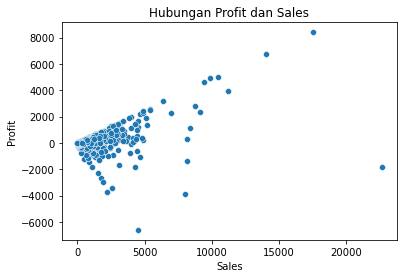

In [126]:
sns.scatterplot(df_sales.Sales, df_sales.Profit).set_title('Hubungan Profit dan Sales');

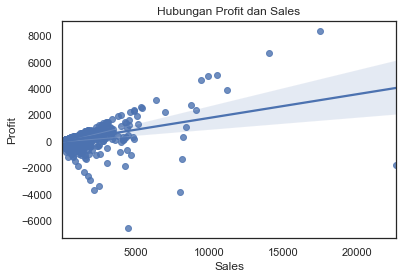

In [209]:
sns.regplot(df_sales.Sales, df_sales.Profit).set_title('Hubungan Profit dan Sales');

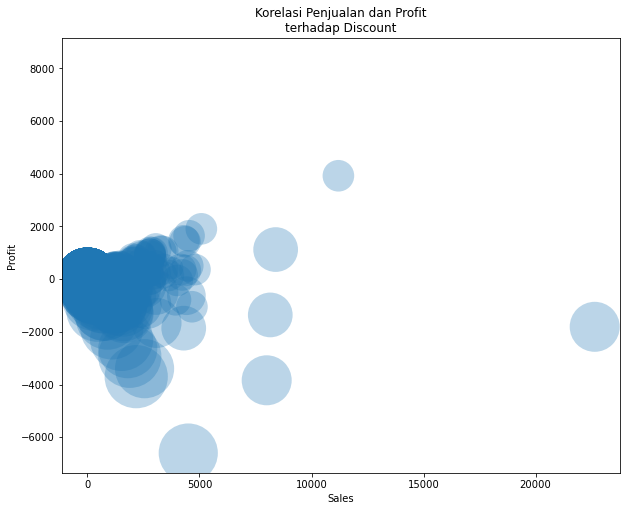

In [127]:
# 3 variables
plt.figure(figsize = (10,8))
j = sns.scatterplot(df_sales.Sales, df_sales.Profit, 
                    s = df_sales.Discount*5000,alpha=0.3).set_title('Korelasi Penjualan dan Profit\nterhadap Discount');

<h3>2.4. Matrix Correlation</h3>

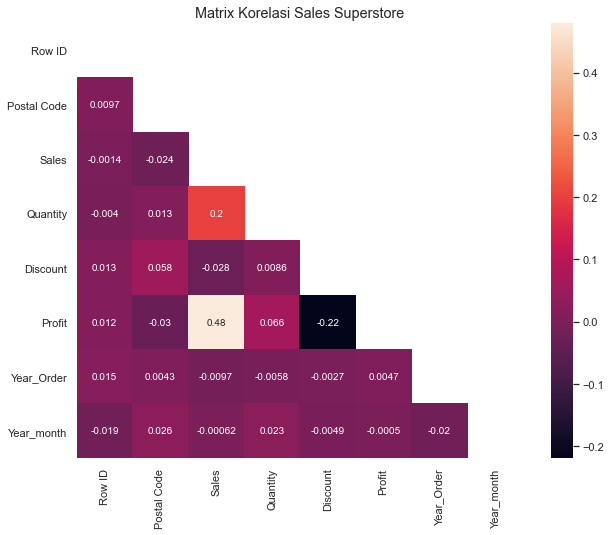

In [267]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_sales.corr(), annot=True, 
    mask=np.triu(np.ones_like(df_sales.corr(), 
        dtype=bool))).set_title('Matrix Korelasi Sales Superstore');

<h3>2.5. Histogram</h3>

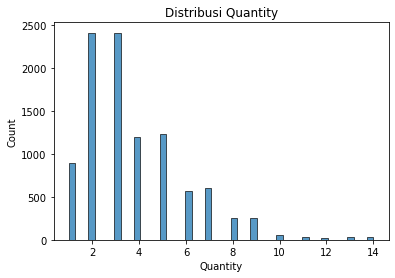

In [89]:
sns.histplot(df_sales.Quantity).set_title('Distribusi Quantity');

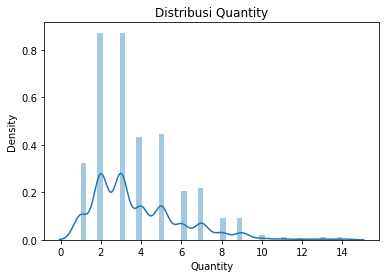

In [90]:
sns.distplot(df_sales.Quantity).set_title('Distribusi Quantity')
plt.show()

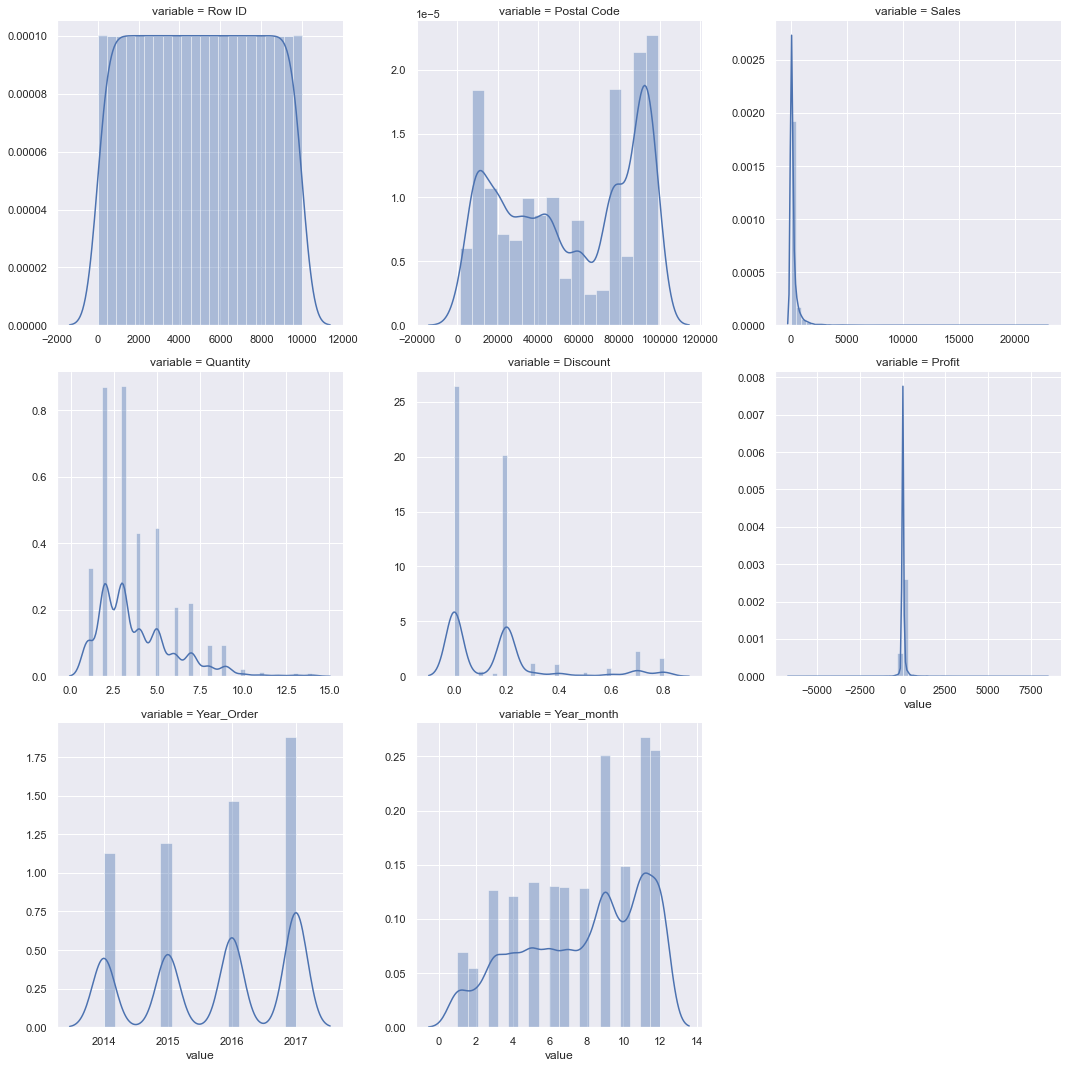

In [179]:
num = df_sales[df_sales.describe().columns]
f = pd.melt(num, value_vars=num)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value")
plt.show()

<h3>2.6. Boxplot</h3>

In [ ]:
sns.boxplot()

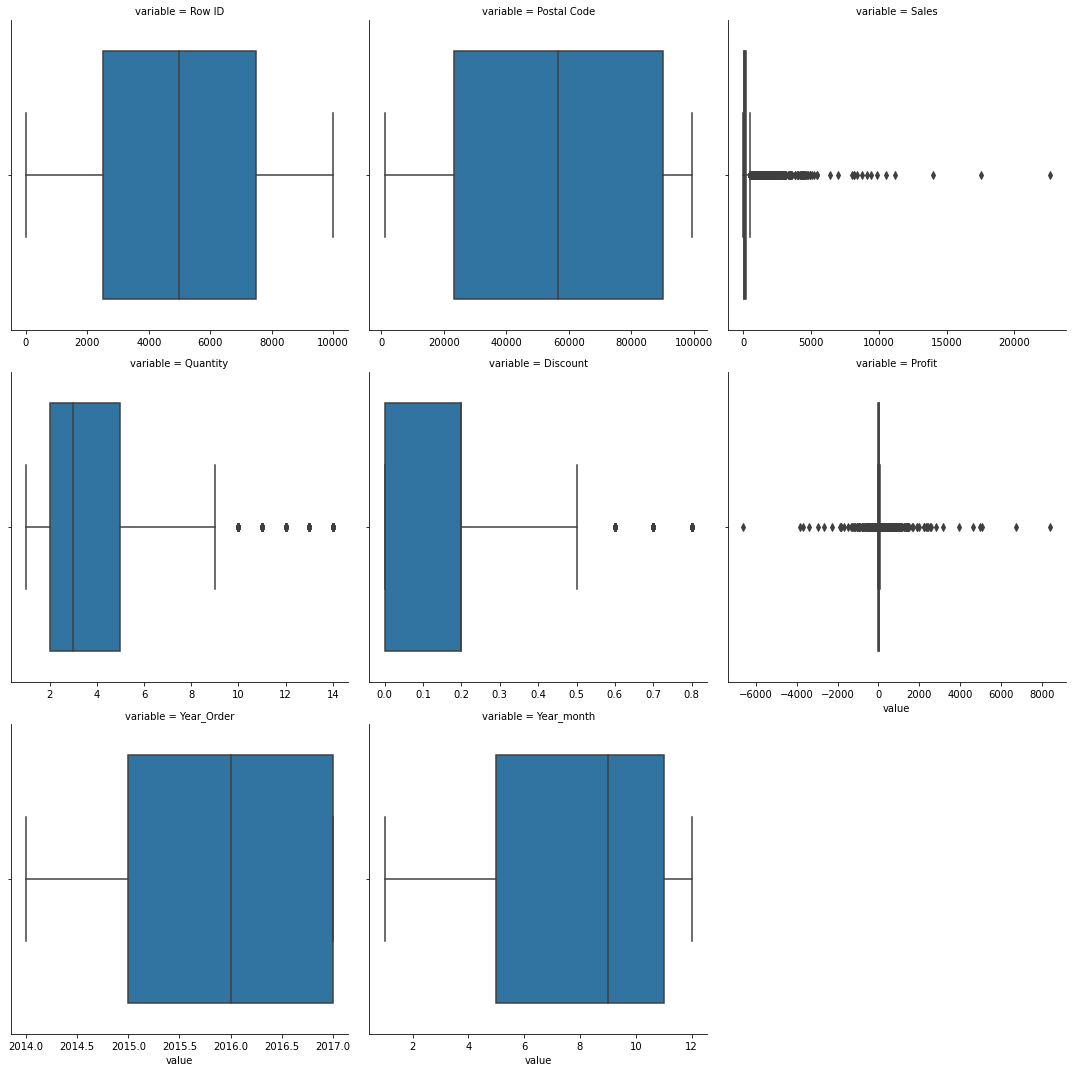

In [95]:
num = df_sales[df_sales.describe().columns.tolist()]
f = pd.melt(num, value_vars=num)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.boxplot, "value");

<h1>8. Geo-Visualization</h1>

In [97]:
# !pip install folium
import folium

In [151]:
folium.Map()

In [156]:
default_location=[-7.8682695, 120.33345]
base_map=folium.Map(location=default_location,
            control_scale=True, 
            zoom_start=4)

In [266]:
df_id = pd.read_csv('data_covid_id.csv')
df_total = pd.read_csv('data_covid_total.csv')
df_global = pd.read_csv('data_global.csv')
for i in range(0, len(df_global)):
    folium.Circle(location=[df_global.iloc[i]['latitude'], df_global.iloc[i]['longitude']],
                 radius=float(df_global.iloc[i]['positif']),#semakin besar positif maka lingkaran semakin besar
                 popup = df_global.iloc[i], #agar kelihatan informasi kalau diklik
                 color='crimsun',#dikasih warna 
                 fill=True, # lingkarannya di dalamnya juga ada warnanya
                 fill_color = 'crimson').add_to(base_map)

In [161]:
base_map

In [162]:
# developing map
base_map=generateBaseMap()
for i in range(0, len(df_global)):
    folium.Circle(location=[df_global.iloc[i]['latitude'], df_global.iloc[i]['longitude']],
                 radius=float(df_global.iloc[i]['sembuh']),#semakin besar positif maka lingkaran semakin besar
                 popup = df_global.iloc[i], #agar kelihatan informasi kalau diklik
                 color='crimson',#dikasih warna 
                 fill=True, # lingkarannya di dalamnya juga ada warnanya
                 fill_color = 'crimson').add_to(base_map)
for i in range(0, len(df_global)):
    folium.Circle(location=[df_global.iloc[i]['latitude'], df_global.iloc[i]['longitude']],
                 radius=float(df_global.iloc[i]['positif']),#semakin besar positif maka lingkaran semakin besar
                 popup = df_global.iloc[i], #agar kelihatan informasi kalau diklik
                 color='yellow',#dikasih warna 
                 fill=True, # lingkarannya di dalamnya juga ada warnanya
                 fill_color = 'yellow').add_to(base_map)
# Circle =  membuat buletan2 sejumlah negaranya karena memakai len(df_global)
base_map